# Aula 03

* pacote os
* datetime
* pacote scipy

## README
Crie uma pasta de dados do diretório 2024, caso você clone este repositório. Alternativamente, você pode criar uma pasta no mesmo diretório deste jupyter notebook com nome de dados

In [205]:
# Importando os pacotes

import os
import datetime
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mdates as mdates
from windrose import WindroseAxes

ModuleNotFoundError: No module named 'matplotlib.mdates'

# Utilizando o pacote OS
Baixando os dados de https://hoinaski.prof.ufsc.br/BRAIN/getMETAR

In [138]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
print('Diretório atual: ' + cwd)

# Estabelecendo a pasta de daos que quero utilizar
dataPath = os.path.dirname(cwd) + '\\dados'

print('Diretório de dados: ' + dataPath)

Diretório atual: C:\PosGraduacao\ENS410064\2024\notebooks
Diretório de dados: C:\PosGraduacao\ENS410064\2024\dados


In [139]:
# Listar documentos que estão dentro da pasta de dados
# Extraindo o nome dos arquivos com o
dataList = os.listdir(dataPath)
print(dataList)
dataList[0]


['metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv', 'Nova pasta']


'metar_FORT_2023.csv'

In [140]:
# Listando arquivos com o nome iniciando em metar
dataList = [filename for filename in os.listdir(dataPath) if filename.startswith("metar")]
print(dataList)

['metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']


In [141]:
# Extraindo os anos dos dados
# Trabalhando com o nome dos arquivos

years = []
for dl in dataList:
    if os.path.isfile(dataPath + '\\' + dl):
        years.append(dl.split('_')[-1].split('.')[0])
    else:
        print(dl + ' não é um arquivo')

years = np.unique(years)
print(years)

# Extraindo as estações de dados

stations = []
for dl in dataList:
    if os.path.isfile(dataPath + '\\' + dl):
        stations.append(dl.split('_')[-2])
    else:
        print(dl + ' não é um arquivo')

stations = np.unique(stations)
print(stations)

['2022' '2023' '2024']
['FORT' 'SBFL']


In [142]:
# Lendo todos os arquivos da pasta
# Todos os dados devem estar no mesmo formato, com as mesmas colunas

dataAll = []

for dl in dataList:
    if dl.split('_')[-2] == stations[1]:
        print(dl)
        data = pd.read_csv(dataPath+'\\'+dl)
        dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)
dataAll.head()

metar_SBFL_2022.csv
metar_SBFL_2023.csv
metar_SBFL_2024.csv


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2022,0,NaN,120.0,1.543332,914.4,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51
1,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00
2,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06
3,1,1,2022,3,NaN,NaN,1.028888,457.2,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00
4,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43


In [194]:
# Criando uma função para gerar figuras e estatísticas

def statisticsAndFigures(dataAll, st, anos, cwd):

    # Criando a pasta das figuras
    os.makedirs(os.path.dirname(cwd)+'\\figuras\\'+st, exist_ok = True)
    
    # Criando uma figura para a estação
    fig, ax = plt.subplots(2)
    ax[0].plot(dataAll.temp,color = 'red')
    ax[1].plot(dataAll.p,color = '#f3c926')
    fig.suptitle(st)

    # Salvando as figuras
    fig.savefig(os.path.dirname(cwd)+'\\figuras\\'+st+'\\timeseries_' + st + '_' + str(anos[0]) + 'to' + str(anos[-1]) + '.png')

    # Criando uma figura para a estação - windrose
    ax = WindroseAxes.from_ax()
    ax.bar(dataAll['wd'], dataAll['ws'], normed=True, opening=0.8, edgecolor="white")
    ax.set_legend()

    # Salvando a figura
    plt.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\windRose_' + st + '_' + str(anos[0]) + 'to' + str(anos[-1]) + '.png')

Não tem a estação FORT para o ano 2022
Tem a estação FORT para o ano 2023
Não tem a estação FORT para o ano 2024
   day  month  year  hour  ct     wd        ws      hc  ccp  cco            p  \
0    1      1  2023     0 NaN   90.0  3.601108     NaN  NaN  NaN  1009.662022   
1    1      1  2023     1 NaN  100.0  4.629996  640.08  3.0  3.0  1009.662022   
2    1      1  2023     2 NaN  100.0  4.629996  670.56  3.0  3.0  1009.665616   
3    1      1  2023     3 NaN  100.0  4.629996  670.56  3.0  3.0  1009.665616   
4    1      1  2023     4 NaN  110.0  4.629996  670.56  3.0  3.0  1009.669209   

   temp  dpTemp  vis   pw   relh  
0  28.0    23.0  NaN  0.0  74.28  
1  28.0    24.0  NaN  0.0  78.90  
2  27.0    24.0  NaN  0.0  83.66  
3  27.0    23.0  NaN  0.0  78.76  
4  27.0    23.0  NaN  0.0  78.76  
Tem a estação SBFL para o ano 2022
Tem a estação SBFL para o ano 2023
Tem a estação SBFL para o ano 2024
   day  month  year  hour  ct     wd        ws     hc  ccp  cco            p  \
0    

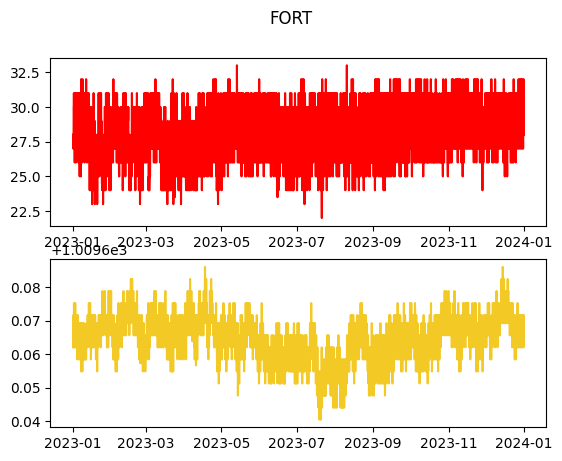

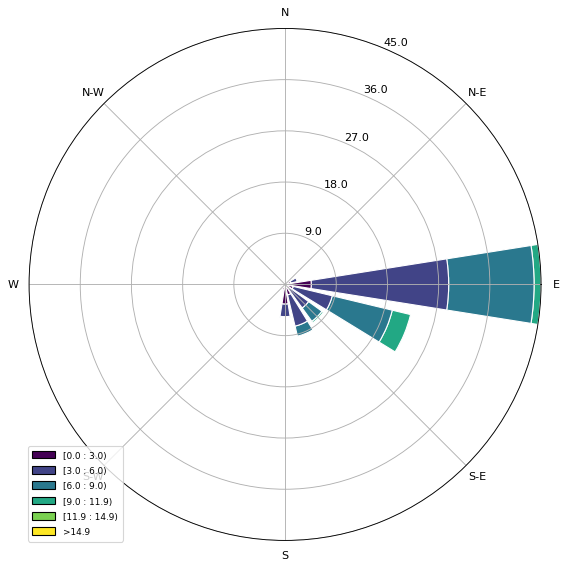

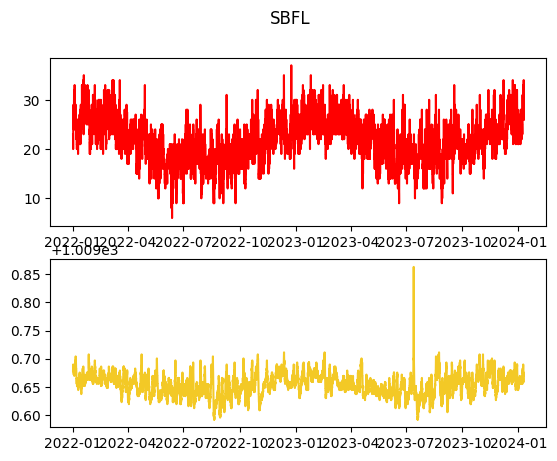

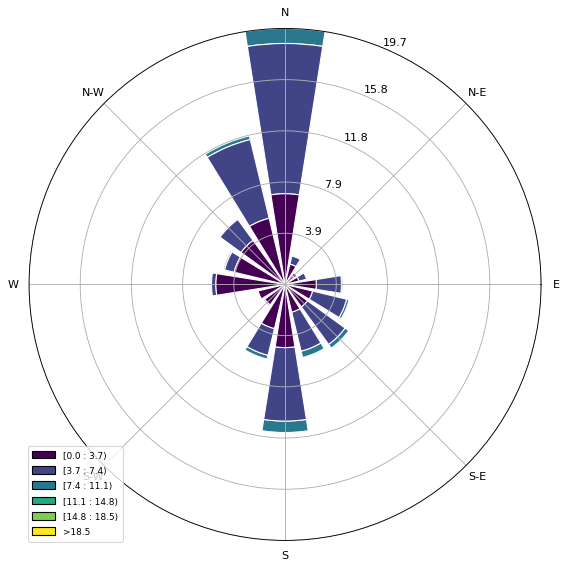

In [204]:
# Condicionando a leitura para apenas uma estação

for st in stations:
    dataAll = []
    anos = []
    for year in years:
        try:
            data = pd.read_csv(dataPath + '\\' + 'metar_' + st + '_' + year + '.csv') 
            print('Tem a estação ' + st + ' para o ano ' + year)
            dataAll.append(data)
            anos.append(int(year))
        except:
            print('Não tem a estação ' + st + ' para o ano ' + year)
    
    # Concatenando a lista de dados
    dataAll = pd.concat(dataAll)
    print(dataAll.head())
    
    # Criando uma coluna datetime no meu dataframe
    dataAll['datetime'] = pd.to_datetime(dataAll[['year','month','day','hour']])
    
    # Criando dataframe sem repetições
    dataAll = dataAll.drop_duplicates(subset='datetime', keep="first")

    # Estabelecendo o datetime como índice
    dataAll.set_index('datetime', inplace = True)

    statisticsAndFigures(dataAll, st, anos, cwd)

## Trabalhando com datas no python

Utilizaremos o pacote datetime e o pandas para trabalhar com datas.
Lembrem que o correto é utilizar datas no formato ano, mês, dia, hora, minuto, segundo ou YYYYMMDDHH ou YYYY/MM/DD - hh:mm:ss

In [147]:
# Importanto pacote datetime
import datetime

In [170]:
date = datetime.datetime(2022,1,1,1,50,40,20)
print(date.year)
print(date.month)
print(date.day)
print(date.hour)
print(date.minute)
print(date.second)

2022
1
1
1
50
40


In [199]:
# Verificando tamanho da variável dataAll com e sem repetições

# tamanho original
print('Este é o tamanho original')
print(dataAll.shape)

# tamanho data
print('\nEste é o tamanho sem repetições de datas')
print(dataAll['datetime'].unique().shape)

Este é o tamanho original
(17731, 17)

Este é o tamanho sem repetições de datas
(17731,)


In [208]:
# Criando coluna com o mes do ano

dataAll['mes'] = dataAll.month
dataAll.head()

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,mes
datetime,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1,1,2022,0,NaN,120.0,1.543332,914.4,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51,1
2022-01-01 01:00:00,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00,1
2022-01-01 02:00:00,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06,1
2022-01-01 03:00:00,1,1,2022,3,NaN,NaN,1.028888,457.2,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00,1
2022-01-01 04:00:00,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43,1


In [215]:
# Fazendo médias mensais

monthAverage = dataAll.groupby(['mes','year']).mean()

# Salvando em formato .csv em uma pasta que eu quero
os.makedirs(os.path.dirname(cwd)+'\\tabelas\\'+st, exist_ok = True)
monthAverage.to_csv(os.path.dirname(cwd)+'\\tabelas\\'+st+'\\monthAverage.csv')

In [216]:
# Fazendo mínimas mensais

monthMin = dataAll.groupby(['mes','year']).min()

# Salvando em formato .csv em uma pasta que eu quero
os.makedirs(os.path.dirname(cwd)+'\\tabelas\\'+st, exist_ok = True)
monthMin.to_csv(os.path.dirname(cwd)+'\\tabelas\\'+st+'\\monthMin.csv')